# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
from ydata_profiling import ProfileReport
from IPython.display import display
from IPython.display import YouTubeVideo

# Description of the Dataset:
The "Data Science Job Salaries" dataset consists of 11 columns, each providing essential details about data science job salaries. The dataset includes information on the work year, experience level, employment type, job title, salary amount, salary currency, salary in USD, employee residence country, remote work ratio, company location, and company size.

### Below are the column descriptions
* work_year: The year the salary was paid.
* experience_level: The experience level in the job during the year
* employment_type: The type of employment for the role
* job_title: The role worked in during the year.
* salary: The total gross salary amount paid.
* salary_currency: The currency of the salary paid as an ISO 4217 currency code.
* salaryinusd: The salary in USD
* employee_residence: Employee's primary country of residence in during the work year as an ISO 3166 country code.
* remote_ratio: The overall amount of work done remotely
* company_location: The country of the employer's main office or contracting branch
* company_size: The median number of people that worked for the company during the year

#### The dataset is divided based on Experience level as follows:

1. EN: Entry Level
2. MI: Mid Level
3. SE: Senior Level
4. EX: Executive Level

#### The dataset is divided based on Employment types as follows:

1. FT: Full Time
2. PT: Part Time
3. CT: Contract basis
4. FL: Freelancer


#### The dataset is divided based on Company size as follows:

1. S: Small
2. M: Medium
3. L: Large

# Objective

The primary purpose of this analysis is to gain a comprehensive understanding of salary trends in the data science job market and identify key factors influencing compensation.

# Data Preprocessing

In [2]:
data = pd.read_csv('/Users/sevadaaghasyan/Downloads/ds_salaries.csv')

In [3]:
data.head()

work_year experience_level employment_type                 job_title  \
0       2023               SE              FT  Principal Data Scientist   
1       2023               MI              CT               ML Engineer   
2       2023               MI              CT               ML Engineer   
3       2023               SE              FT            Data Scientist   
4       2023               SE              FT            Data Scientist   

   salary salary_currency  salary_in_usd employee_residence  remote_ratio  \
0   80000             EUR          85847                 ES           100   
1   30000             USD          30000                 US           100   
2   25500             USD          25500                 US           100   
3  175000             USD         175000                 CA           100   
4  120000             USD         120000                 CA           100   

  company_location company_size  
0               ES            L  
1               US            S  
2               US            S  
3               CA            M  
4               CA            M

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [5]:
data.describe().T

count           mean            std     min       25%  \
work_year      3755.0    2022.373635       0.691448  2020.0    2022.0   
salary         3755.0  190695.571771  671676.500508  6000.0  100000.0   
salary_in_usd  3755.0  137570.389880   63055.625278  5132.0   95000.0   
remote_ratio   3755.0      46.271638      48.589050     0.0       0.0   

                    50%       75%         max  
work_year        2022.0    2023.0      2023.0  
salary         138000.0  180000.0  30400000.0  
salary_in_usd  135000.0  175000.0    450000.0  
remote_ratio        0.0     100.0       100.0

In [6]:
data.describe(include="object").T

count unique            top  freq
experience_level    3755      4             SE  2516
employment_type     3755      4             FT  3718
job_title           3755     93  Data Engineer  1040
salary_currency     3755     20            USD  3224
employee_residence  3755     78             US  3004
company_location    3755     72             US  3040
company_size        3755      3              M  3153

In [7]:
experience_mapped = {
    'SE': 'Senior',
    'MI': 'Middle',
    'EN': 'Entry',
    'EX': 'Executive'
}

employment_status = {
    'FT': 'Full Time',
    'CT': 'Contract',
    'FL': 'Freelance',
    'PT': 'Part Time'
}

company_size_labels = {
    'L' :'Large',
    'S' :'Small',
    'M' :'Medium'
}

country_labels = {'ES': 'Spain','US': 'United States','CA': 'Canada',
                  'DE': 'Germany','GB': 'United Kingdom','NG': 'Nigeria',
                  'IN': 'India','HK': 'Hong Kong','PT': 'Portugal',
                  'NL': 'Netherlands','CH': 'Switzerland','CF': 'Central African Republic',
                  'FR': 'France','AU': 'Australia','FI': 'Finland','UA': 'Ukraine',
                  'IE': 'Ireland','IL': 'Israel','GH': 'Ghana','AT': 'Austria',
                  'CO': 'Colombia','SG': 'Singapore','SE': 'Sweden','SI': 'Slovenia',
                  'MX': 'Mexico','UZ': 'Uzbekistan','BR': 'Brazil','TH': 'Thailand',
                  'HR': 'Croatia','PL': 'Poland','KW': 'Kuwait','VN': 'Vietnam',
                  'CY': 'Cyprus','AR': 'Argentina','AM': 'Armenia','BA': 'Bosnia and Herzegovina',
                  'KE': 'Kenya','GR': 'Greece','MK': 'North Macedonia','LV': 'Latvia',
                  'RO': 'Romania','PK': 'Pakistan','IT': 'Italy','MA': 'Morocco','LT': 'Lithuania',
                  'BE': 'Belgium','AS': 'American Samoa','IR': 'Iran','HU': 'Hungary','SK': 'Slovakia',
                  'CN': 'China','CZ': 'Czech Republic','CR': 'Costa Rica','TR': 'Turkey','CL': 'Chile',
                  'PR': 'Puerto Rico','DK': 'Denmark','BO': 'Bolivia','PH': 'Philippines',
                  'DO': 'Dominican Republic','EG': 'Egypt','ID': 'Indonesia','AE': 'United Arab Emirates',
                  'MY': 'Malaysia','JP': 'Japan','EE': 'Estonia','HN': 'Honduras','TN': 'Tunisia',
                  'RU': 'Russia','DZ': 'Algeria','IQ': 'Iraq','BG': 'Bulgaria','JE': 'Jersey',
                  'RS': 'Serbia','NZ': 'New Zealand','MD': 'Moldova','LU': 'Luxembourg','MT': 'Malta'
                }


In [8]:
def tweak_data(data):
    return (
        data.assign(
            company_size=lambda data: data['company_size'].replace(company_size_labels),
            experience_level=lambda data: data['experience_level'].replace(experience_mapped),
            employee_residence=lambda data: data['employee_residence'].replace(country_labels),
            employment_type=lambda data: data['employment_type'].replace(employment_status),
            company_location=lambda data: data['company_location'].replace(country_labels)
        )
    )

In [9]:
salaries_data = tweak_data(data)

salaries_data

work_year experience_level employment_type                 job_title  \
0          2023           Senior       Full Time  Principal Data Scientist   
1          2023           Middle        Contract               ML Engineer   
2          2023           Middle        Contract               ML Engineer   
3          2023           Senior       Full Time            Data Scientist   
4          2023           Senior       Full Time            Data Scientist   
...         ...              ...             ...                       ...   
3750       2020           Senior       Full Time            Data Scientist   
3751       2021           Middle       Full Time  Principal Data Scientist   
3752       2020            Entry       Full Time            Data Scientist   
3753       2020            Entry        Contract     Business Data Analyst   
3754       2021           Senior       Full Time      Data Science Manager   

       salary salary_currency  salary_in_usd employee_residence  remote_ratio  \
0       80000             EUR          85847              Spain           100   
1       30000             USD          30000      United States           100   
2       25500             USD          25500      United States           100   
3      175000             USD         175000             Canada           100   
4      120000             USD         120000             Canada           100   
...       ...             ...            ...                ...           ...   
3750   412000             USD         412000      United States           100   
3751   151000             USD         151000      United States           100   
3752   105000             USD         105000      United States           100   
3753   100000             USD         100000      United States           100   
3754  7000000             INR          94665              India            50   

     company_location company_size  
0               Spain        Large  
1       United States        Small  
2       United States        Small  
3              Canada       Medium  
4              Canada       Medium  
...               ...          ...  
3750    United States        Large  
3751    United States        Large  
3752    United States        Small  
3753    United States        Large  
3754            India        Large  

[3755 rows x 11 columns]

In [10]:
unique_values = salaries_data.nunique()
unique_values

work_year                4
experience_level         4
employment_type          4
job_title               93
salary                 815
salary_currency         20
salary_in_usd         1035
employee_residence      78
remote_ratio             3
company_location        72
company_size             3
dtype: int64

In [11]:
salaries_data.isna().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [12]:
salaries_data.duplicated().sum()

1171

In [13]:
salaries_data.drop_duplicates(keep='first', inplace=True)

In [14]:
salaries_data.duplicated().any()

False

# A novelty as well as a discovery for me 

### Short version of EDA and visualization

In [15]:
profile = ProfileReport(salaries_data)
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

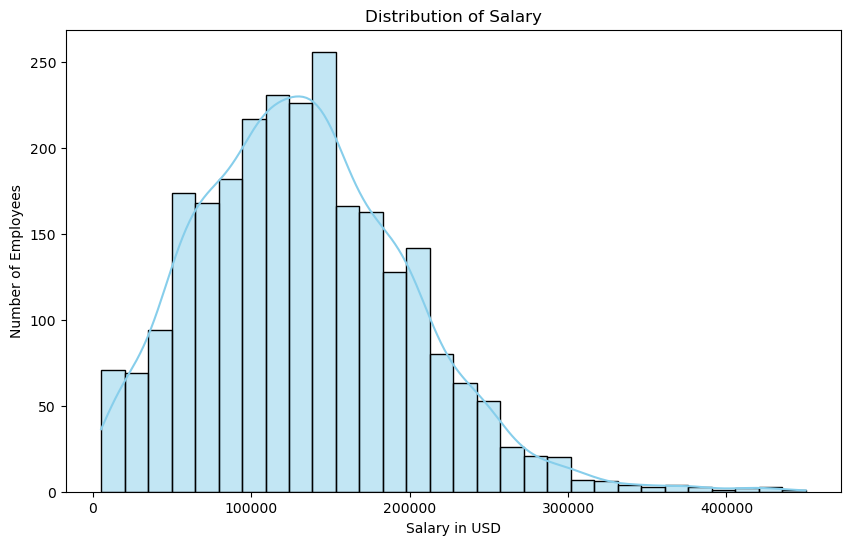

In [16]:
plt.figure(figsize=(10, 6))
sns.histplot(salaries_data['salary_in_usd'], kde=True, bins=30, color='skyblue')
plt.title('Distribution of Salary')
plt.xlabel('Salary in USD')
plt.ylabel('Number of Employees')
plt.show()

* A large portion of the employees' salaries fall within the range of 100-150k dollars.

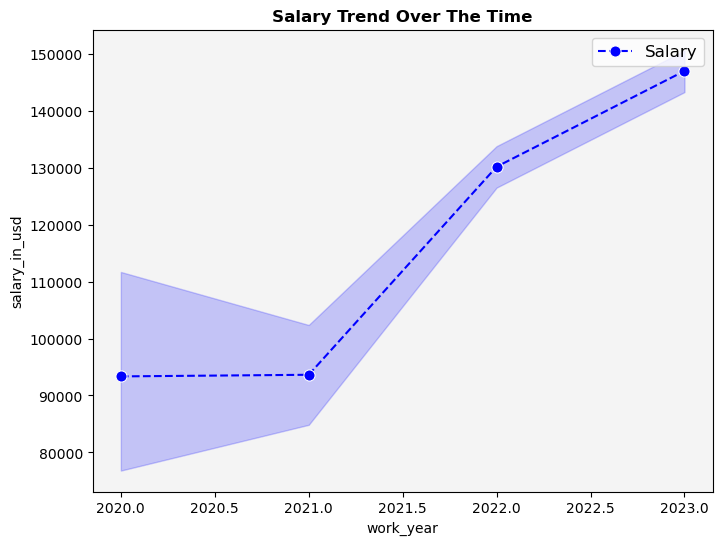

In [17]:
plt.figure(figsize = (8,6))
salary_trend = salaries_data[['salary_in_usd', 'work_year']].sort_values(by = 'work_year')
p = sns.lineplot(data =salary_trend ,x = 'work_year', y = 'salary_in_usd', marker = 'o',linestyle='--', color='Blue', markersize=8 )
plt.title('Salary Trend Over The Time', fontsize=12, fontweight='bold')

# Customize the background color
p.set_facecolor("#f4f4f4")
plt.legend(['Salary'], loc='best', fontsize=12)

# Remove the grid lines
p.grid(False)

plt.show()

* There wasn't much change in salary from 2020 to 2021.
* Continual changes occurred in salary from 2021 to 2022.
* The progress in salary from 2022 to 2023 followed a similar pattern.

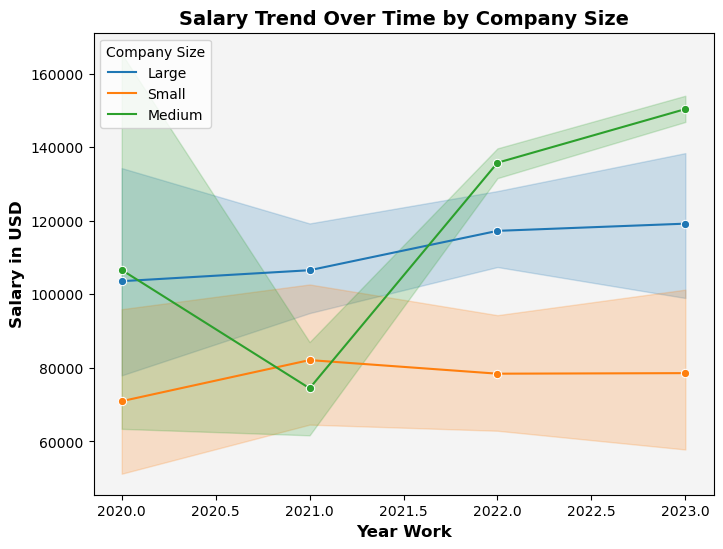

In [18]:
plt.figure(figsize=(8, 6))
p = sns.lineplot(data=salaries_data, x='work_year', y='salary_in_usd', hue='company_size', marker='o')

plt.xlabel('Year Work', fontsize=12, fontweight='bold')
plt.ylabel('Salary in USD', fontsize=12, fontweight='bold')

# Add a legend
plt.legend(title='Company Size', title_fontsize=10, fontsize=10, loc='upper left')

# Add a title
plt.title('Salary Trend Over Time by Company Size', fontsize=14, fontweight='bold')


# Customize the background color
p.set_facecolor("#f4f4f4")

# Remove the grid lines
p.grid(False)
plt.show()

* The salary trend in medium-sized companies is increasing compared to small and large companies.
* The salary line in large companies is not fluctuating as much as in medium-sized companies.

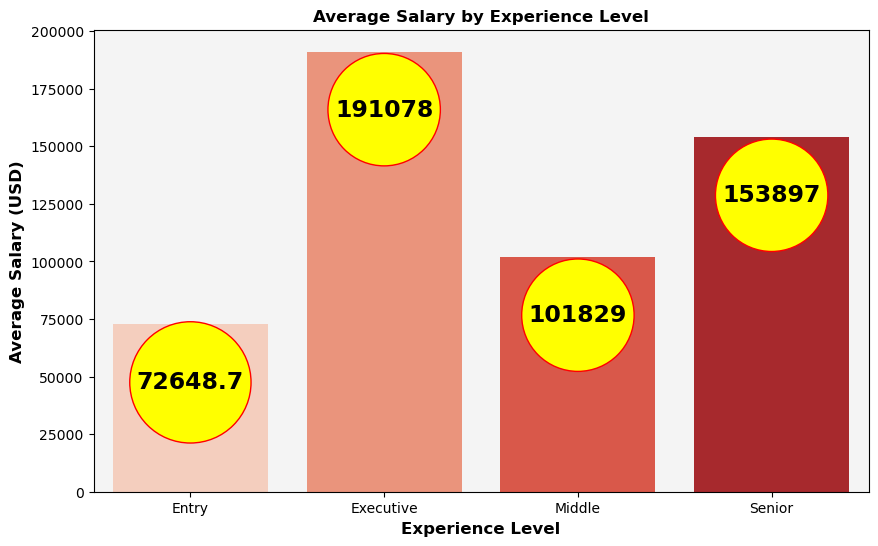

In [19]:
exp_salary = salaries_data.groupby('experience_level')['salary_in_usd'].mean()
plt.figure(figsize = (10,6))
ax = sns.barplot(x = exp_salary.index, y = exp_salary.values, palette = 'Reds')
plt.title('Average Salary by Experience Level', fontsize=12, fontweight='bold')
plt.xlabel('Experience Level', fontsize=12, fontweight='bold')
plt.ylabel('Average Salary (USD)', fontsize=12, fontweight='bold')

for container in ax.containers:
    ax.bar_label(container,
                padding = -50,
                fontsize = 17,
                bbox = {'boxstyle': 'circle', 'edgecolor': 'red', 'facecolor': 'yellow'},
                label_type="edge",
                fontweight = 'bold'
                
                
                )

# Customize the background color
ax.set_facecolor("#f4f4f4")

# Remove the grid lines
ax.grid(False)

plt.show()

* Experienced professionals earn the highest average salary at approximately 194,931 USD.
* Seniors also receive a competitive average salary of about 153,062 USD.
* Mid-Level employees have an average salary of around 104,545 USD.
* Entry-Level positions offer a lower average salary, at approximately 78,546 USD.

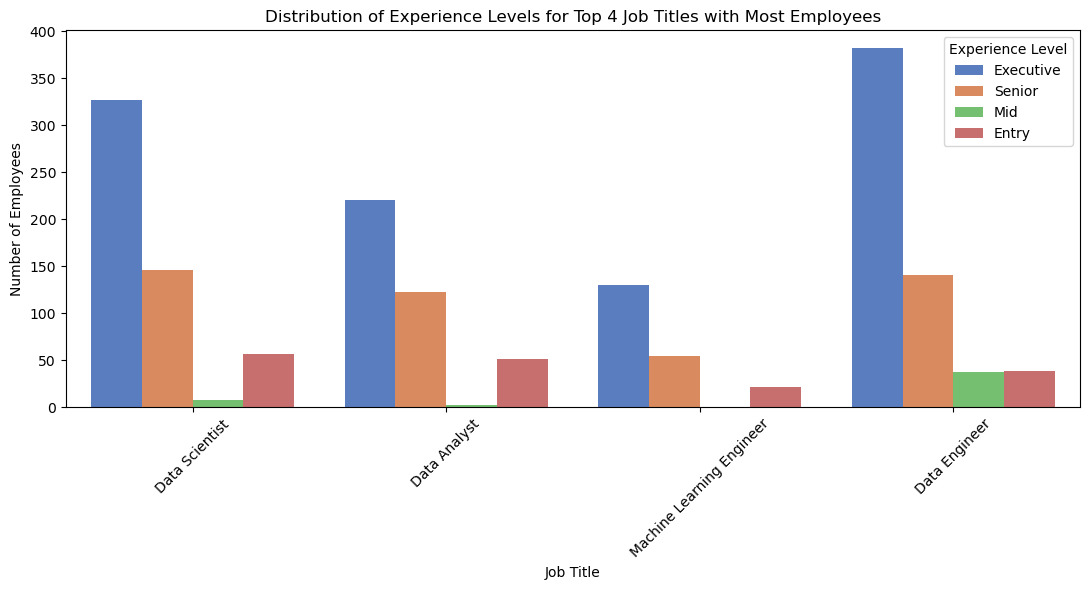

In [20]:
top_4_job_titles = salaries_data['job_title'].value_counts().nlargest(4).index
top_4_job_titles_df = salaries_data[salaries_data['job_title'].isin(top_4_job_titles)]
plt.figure(figsize=(11, 6))
sns.countplot(x='job_title', hue='experience_level',data=top_4_job_titles_df, palette='muted')
plt.title('Distribution of Experience Levels for Top 4 Job Titles with Most Employees')
plt.xlabel('Job Title')
plt.ylabel('Number of Employees')
legend_labels= ['Executive','Senior','Mid', 'Entry']
plt.legend(labels = legend_labels ,title='Experience Level', loc='upper right')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The top 4 professions with the highest number of employees in the sector, we can observe that a vast majority of the workforce holds the experience level of "Senior."

/var/folders/rn/2jbc093n0csfj73b8ms70wz00000gn/T/ipykernel_23726/73997271.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), fontweight='bold')


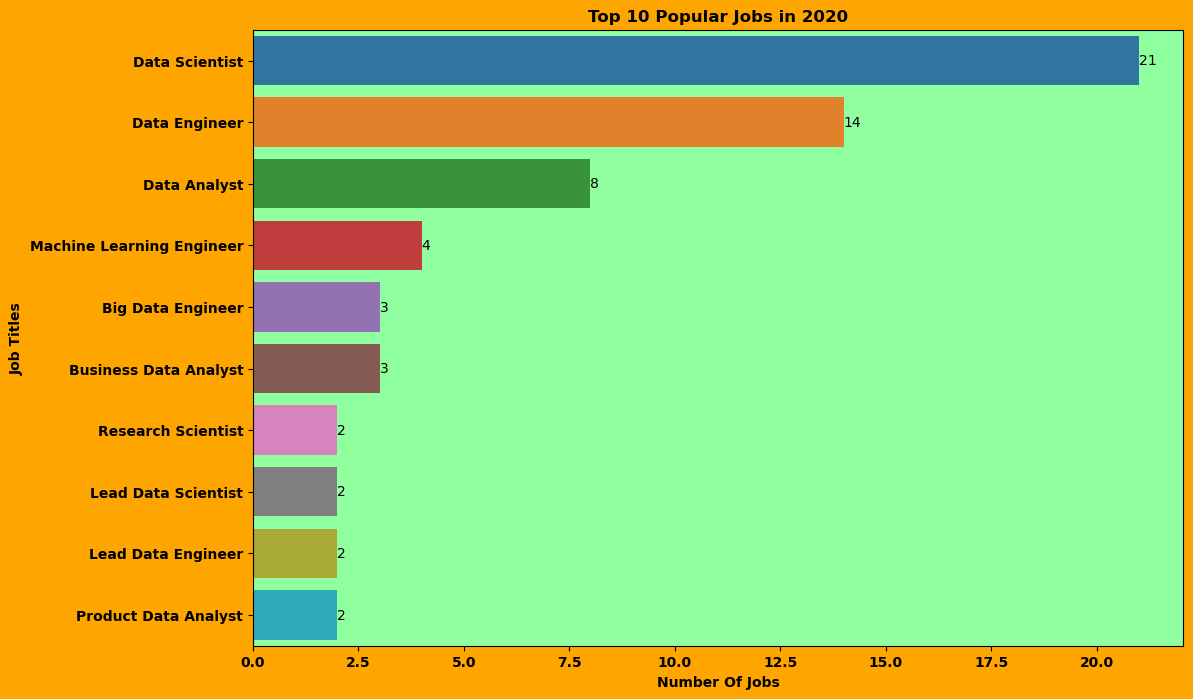

/var/folders/rn/2jbc093n0csfj73b8ms70wz00000gn/T/ipykernel_23726/73997271.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), fontweight='bold')


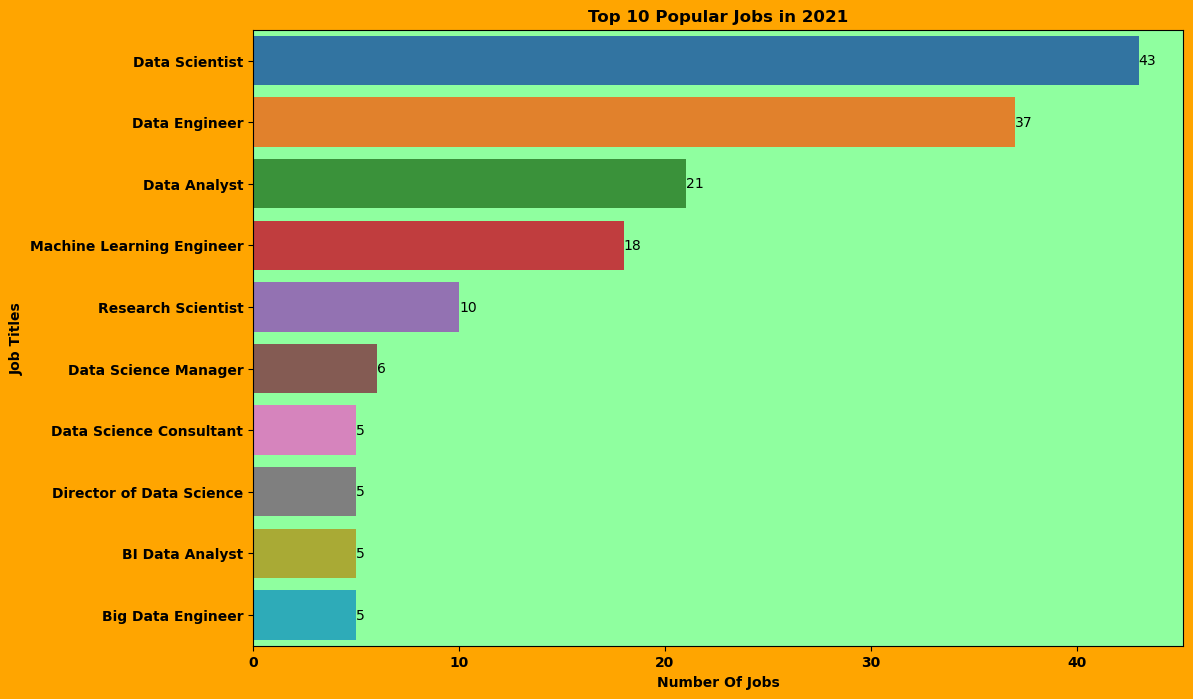

/var/folders/rn/2jbc093n0csfj73b8ms70wz00000gn/T/ipykernel_23726/73997271.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), fontweight='bold')


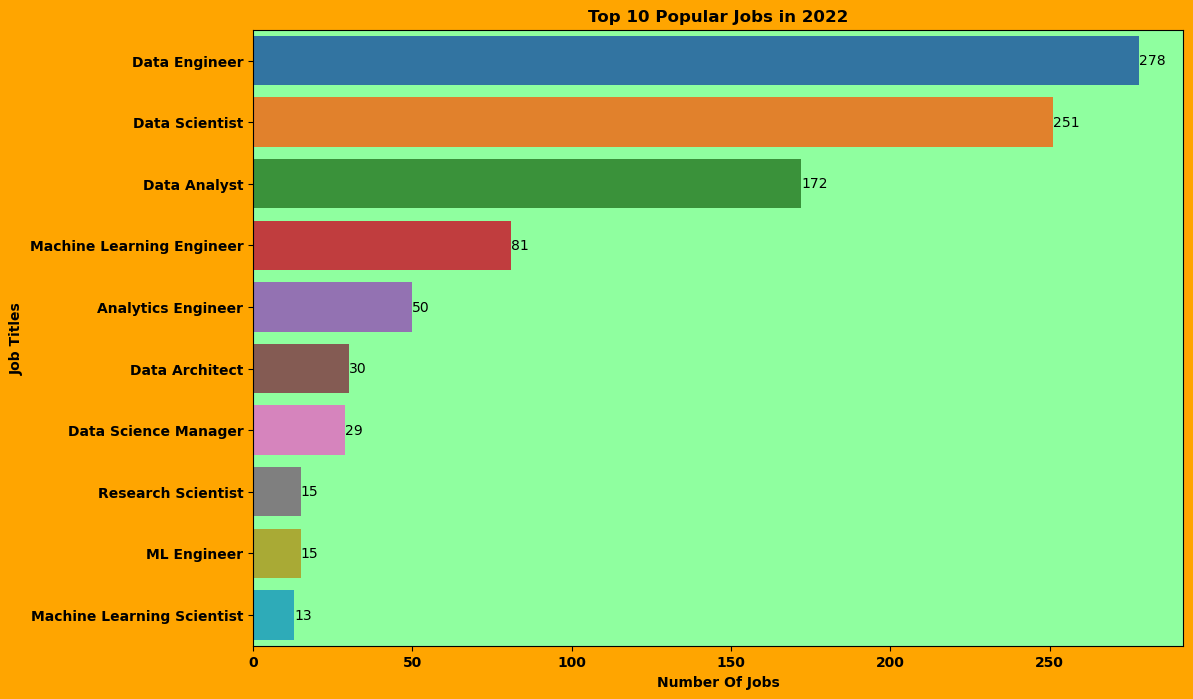

/var/folders/rn/2jbc093n0csfj73b8ms70wz00000gn/T/ipykernel_23726/73997271.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), fontweight='bold')


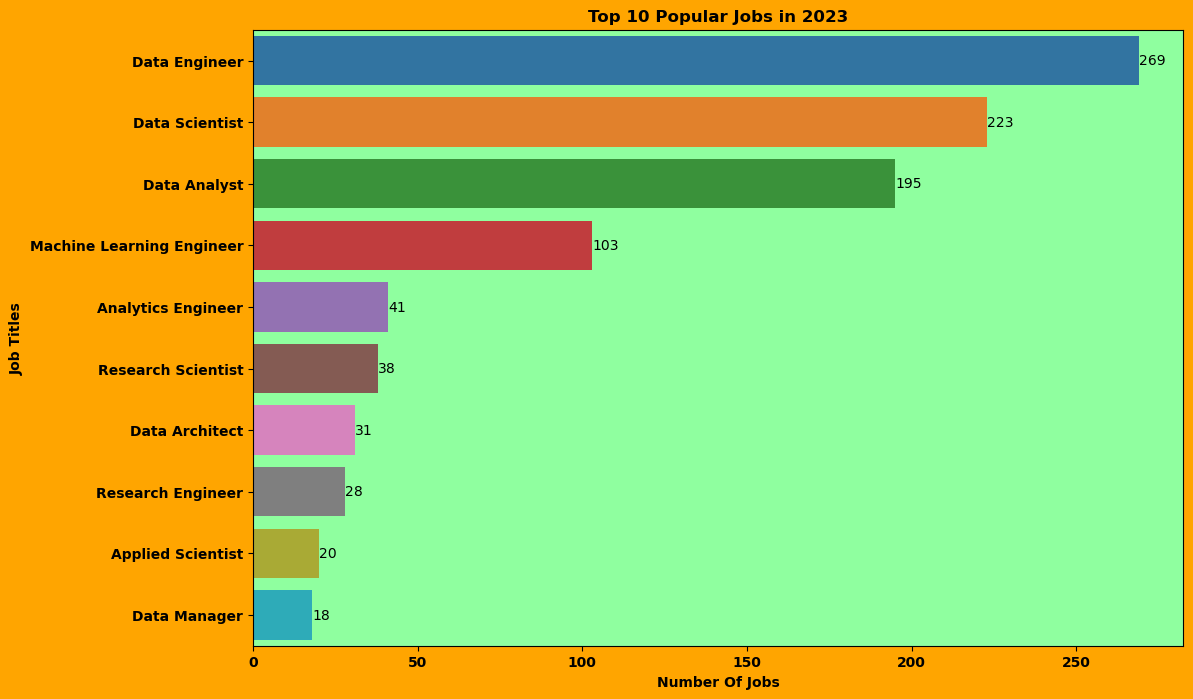

In [21]:
for i in sorted(salaries_data["work_year"].unique()):  
    plt.figure(facecolor="orange", figsize=(12, 8))
    ax = sns.barplot(y=salaries_data[salaries_data['work_year']==i]['job_title'].value_counts().nlargest(10).index, 
                     x=salaries_data[salaries_data['work_year']==i]['job_title'].value_counts().nlargest(10))
    ax.set(ylabel='Job Titles', xlabel='Counts')
    ax.set_xlabel('Number Of Jobs', fontweight='bold')
    ax.set_ylabel('Job Titles', fontweight='bold')
    ax.set_xticklabels(ax.get_xticklabels(), fontweight='bold')
    ax.set_yticklabels(ax.get_yticklabels(), fontweight='bold')
    ax.set_title(f'Top 10 Popular Jobs in {i}', fontweight='bold')
    ax.set_facecolor("xkcd:mint green")
    ax.bar_label(ax.containers[0])
    plt.show()

In [22]:
fig = px.treemap(
    salaries_data, 
    path = [salaries_data.job_title], 
    values = salaries_data['salary'],
    title='Highly Paying Jobs'
)

fig.update_traces(root_color = "lightgrey")
fig.update_layout(margin = dict(t = 50, l = 25, r = 25, b = 25))
fig.show()

* The most in-demand jobs for every year are data scientist, data engineer, data analyst and ML engineer
* Data science is the highest paying job


In [23]:
salary_designation = salaries_data.groupby(['salary_in_usd', 'job_title']).size().reset_index()
salary_designation = salary_designation[-25:]

fig = px.bar(x=salary_designation['job_title'], y=salary_designation['salary_in_usd'], 
             text=salary_designation['salary_in_usd'], color=salary_designation['salary_in_usd'])

fig.update_layout(xaxis_title='Job Designation', yaxis_title='Salaries')
fig.update_layout(xaxis_tickangle=-45, title='Top 25 Highest Salary by Designation')

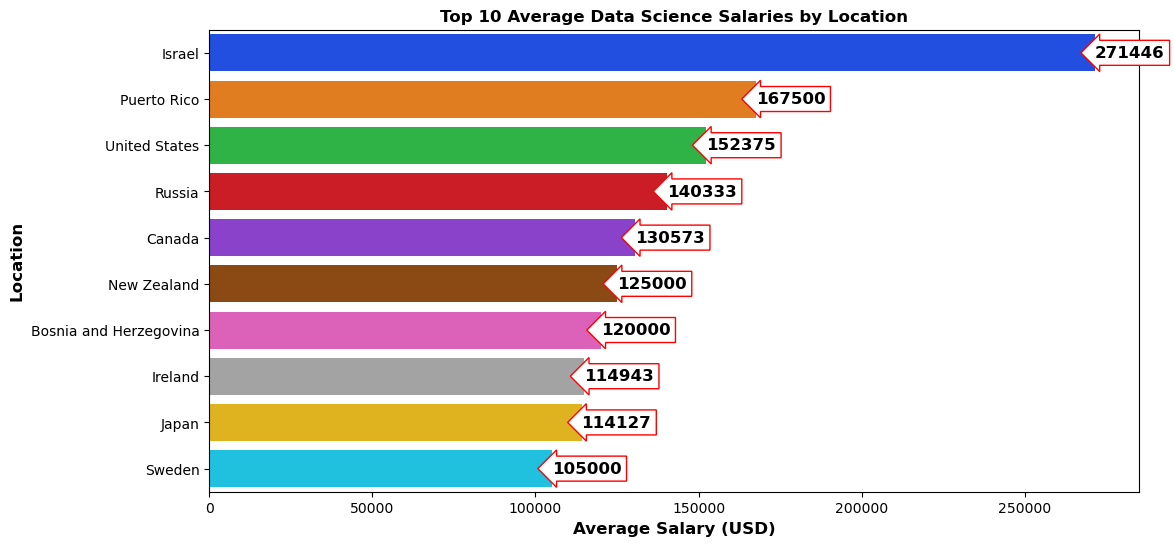

In [24]:
# Group the data by company_location and calculate the mean salary for each location
average_salaries_by_location = salaries_data.groupby('company_location')['salary_in_usd'].mean().reset_index()

# Sort the locations by average salary in descending order
average_salaries_by_location = average_salaries_by_location.sort_values(by='salary_in_usd', ascending=False)

# Select the top N locations to plot
top_n_locations = 10  # You can change this number as needed

# Create a bar chart to visualize average salaries by country
plt.figure(figsize=(12, 6))
p = sns.barplot(x='salary_in_usd', y='company_location', data=average_salaries_by_location.head(top_n_locations), palette = 'bright')
plt.title('Top {} Average Data Science Salaries by Location'.format(top_n_locations), fontsize=12, fontweight='bold' )
plt.xlabel('Average Salary (USD)', fontsize=12, fontweight='bold')
plt.ylabel('Location', fontsize=12, fontweight='bold')

for container in p.containers:
    p.bar_label(container,
                fontsize = 12,
                bbox = {'boxstyle': 'larrow', 'edgecolor': 'red', 'facecolor': 'white'},
                label_type="edge",
                fontweight = 'bold'
               )

# Customize the background color
ax.set_facecolor("#f4f4f4")
plt.show()

* In Israel (IL), the average data science salary is notably high, at approximately 271,447 USD.
* Puerto Rico (PR) and the United States (US) also offer competitive average salaries, with approximately 167,500 USD and 151,801 USD, respectively.
* Russia (RU) and Canada (CA) have average data science salaries of around 140,333 USD and 131,918 USD, respectively.
* New Zealand (NZ), Bosnia and Herzegovina (BA), Ireland (IE), Japan (JP), and Sweden (SE) round out the top locations with varying average salaries.

# For those who don't know who is data scientist

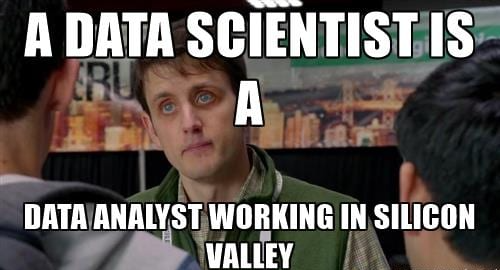

For those who don't know who a Data Scientist is, you can watch this short video which introduces the job description and main responsibilities of a Data Scientist.

In [25]:
video = YouTubeVideo("X3paOmcrTjQ", height=600, width=800)

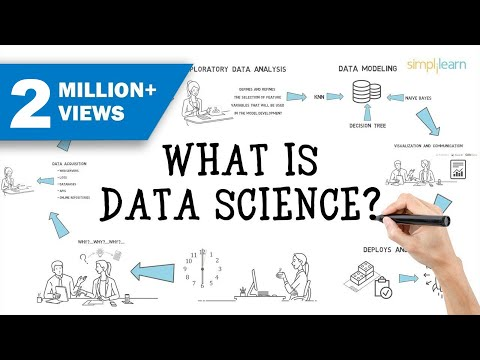

In [26]:
display(video)